In [136]:
import yfinance as yf

# Download AMARIN stock data from 2023 to 2024
data = yf.download("AMARIN.BK", start="2015-01-01", end="2025-01-01")
print(data.head())

[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open    Volume
Ticker     AMARIN.BK AMARIN.BK AMARIN.BK AMARIN.BK AMARIN.BK
Date                                                        
2015-01-05  6.421583  6.483329  6.359837  6.483329      4175
2015-01-06  6.298091  6.421582  6.298091  6.421582     13285
2015-01-07  6.359837  6.359837  6.359837  6.359837      5061
2015-01-08  6.359837  6.359837  6.298091  6.359837     64657
2015-01-09  6.359837  6.359837  6.298091  6.298091     10755


In [138]:
data.describe()

Price,Close,High,Low,Open,Volume
Ticker,AMARIN.BK,AMARIN.BK,AMARIN.BK,AMARIN.BK,AMARIN.BK
count,2430.000000,2430.000000,2430.000000,2430.000000,2.430000e+03
mean,4.740573,4.795202,4.680155,4.739095,3.472428e+05
std,1.144960,1.164342,1.132088,1.148537,4.331129e+06
min,2.025823,2.310443,1.674234,1.690976,0.000000e+00
25%,4.018162,4.046963,3.980061,4.013090,1.215950e+04
50%,4.527936,4.600829,4.470310,4.535570,3.645000e+04
75%,5.444129,5.515250,5.343463,5.423329,1.263000e+05
max,8.483798,9.005878,8.483798,8.483798,1.387526e+08


In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2430 entries, 2015-01-05 to 2024-12-30
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   (Close, AMARIN.BK)   2430 non-null   float64
 1   (High, AMARIN.BK)    2430 non-null   float64
 2   (Low, AMARIN.BK)     2430 non-null   float64
 3   (Open, AMARIN.BK)    2430 non-null   float64
 4   (Volume, AMARIN.BK)  2430 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 113.9 KB


In [142]:
data

Price,Close,High,Low,Open,Volume
Ticker,AMARIN.BK,AMARIN.BK,AMARIN.BK,AMARIN.BK,AMARIN.BK
Date,,,,,
2015-01-05,6.421583,6.483329,6.359837,6.483329,4175
2015-01-06,6.298091,6.421582,6.298091,6.421582,13285
2015-01-07,6.359837,6.359837,6.359837,6.359837,5061
2015-01-08,6.359837,6.359837,6.298091,6.359837,64657
2015-01-09,6.359837,6.359837,6.298091,6.298091,10755
...,...,...,...,...,...
2024-12-24,3.140000,3.140000,3.140000,3.140000,100
2024-12-25,3.140000,3.140000,3.000000,3.000000,700


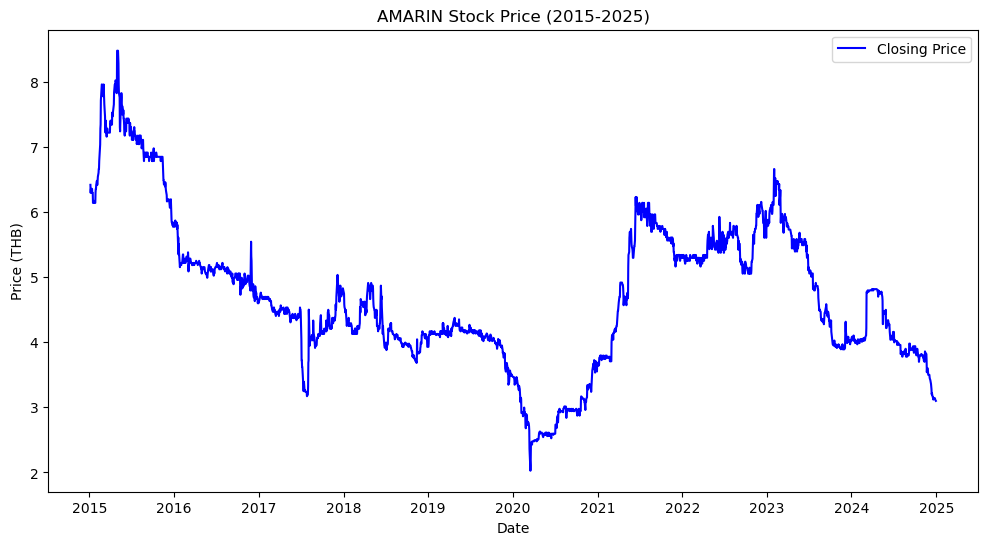

In [144]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label="Closing Price", color='blue')
plt.title("AMARIN Stock Price (2015-2025)")
plt.xlabel("Date")
plt.ylabel("Price (THB)")
plt.legend()
plt.show()


In [62]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [98]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# ใช้เฉพาะราคาปิด (Close Price)
close_prices = data['Close'].values.reshape(-1, 1)

# **Normalize ข้อมูล**
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(close_prices)

# **ฟังก์ชันสร้าง features แบบ Rolling Window**
def create_features(data, window_size=2520):  # เปลี่ยนเป็น 10 ปี (2520 วัน)
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i : i + window_size])  # ใช้ข้อมูล 10 ปีเป็น feature
        y.append(data[i + window_size])      # วันถัดไปเป็น target
    return np.array(X), np.array(y)

# **สร้าง features**
window_size = 2520  # 10 ปี (2520 วัน)
X, y = create_features(data_normalized, window_size)

# **แบ่ง Train-Test**
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (160, 2520, 1)
Shape of y_train: (160, 1)
Shape of X_test: (41, 2520, 1)
Shape of y_test: (41, 1)


In [102]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, r2_score

# แปลงข้อมูลให้เป็น 3D สำหรับ LSTM
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# สร้างโมเดล LSTM
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
lstm_model.add(Dense(1))

# คอมไพล์โมเดล
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# ฝึกสอนโมเดล
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, verbose=1)

# ทำนายผล
y_pred_lstm = lstm_model.predict(X_test_lstm)

# คำนวณค่าประเมินผล
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)

print("LSTM - MSE:", mse_lstm)
print("LSTM - R2:", r2_lstm)

Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 233ms/step - loss: 0.0280
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 226ms/step - loss: 0.0111
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 231ms/step - loss: 0.0021
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 230ms/step - loss: 0.0017
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 228ms/step - loss: 0.0017
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 238ms/step - loss: 5.0451e-04
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 236ms/step - loss: 6.4620e-04
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 232ms/step - loss: 7.4297e-04
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 239ms/step - loss: 5.0319e-04
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 235ms/step - loss: 4.5667e-04
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
LSTM - MSE: 0.0022603064588479762
LSTM - R2: -2.244225731582796


## import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# โหลดข้อมูลหุ้น AMARIN
ticker = "AMARIN.BK"
data = yf.download(ticker, start="2013-01-01", end="2023-12-31")
data = data[['Close']].dropna()

# สร้างฟีเจอร์ Moving Average
data['MA_50'] = data['Close'].rolling(window=50).mean()
data['MA_200'] = data['Close'].rolling(window=200).mean()
data.dropna(inplace=True)

# แบ่งข้อมูล Train/Test
train = data[:'2023']
X_train, y_train = train.drop(columns=['Close']), train['Close']

# ---------- เทรนโมเดล ----------

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# XGBoost
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)

# LSTM
X_train_lstm = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))

model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train_lstm, y_train, epochs=20, verbose=0)

# ---------- พยากรณ์ 2024-2026 ----------
future_dates = pd.date_range(start="2024-01-01", periods=1095, freq='D')
future_features = X_train.iloc[-1095:].values  # ใช้ข้อมูลล่าสุด

future_pred_lr = lr.predict(future_features)
future_pred_rf = rf.predict(future_features)
future_pred_xgb = xgb.predict(future_features)

future_features_lstm = np.array(future_features).reshape((future_features.shape[0], future_features.shape[1], 1))
future_pred_lstm = model.predict(future_features_lstm).flatten()

# ---------- พล็อตกราฟแยก ----------

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# กราฟ 1: Linear Regression
axes[0, 0].plot(data.index, data['Close'], label="Actual Price", color="black")
axes[0, 0].plot(future_dates, future_pred_lr, label="Linear Regression", linestyle="dashed", color="blue")
axes[0, 0].set_title("AMARIN Prediction (2024-2026) - Linear Regression")
axes[0, 0].legend()

# กราฟ 2: Random Forest
axes[0, 1].plot(data.index, data['Close'], label="Actual Price", color="black")
axes[0, 1].plot(future_dates, future_pred_rf, label="Random Forest", linestyle="dashed", color="green")
axes[0, 1].set_title("AMARIN Prediction (2024-2026) - Random Forest")
axes[0, 1].legend()

# กราฟ 3: XGBoost
axes[1, 0].plot(data.index, data['Close'], label="Actual Price", color="black")
axes[1, 0].plot(future_dates, future_pred_xgb, label="XGBoost", linestyle="dashed", color="red")
axes[1, 0].set_title("AMARIN Prediction (2024-2026) - XGBoost")
axes[1, 0].legend()

# กราฟ 4: LSTM
axes[1, 1].plot(data.index, data['Close'], label="Actual Price", color="black")
axes[1, 1].plot(future_dates, future_pred_lstm, label="LSTM", linestyle="dashed", color="purple")
axes[1, 1].set_title("AMARIN Prediction (2024-2026) - LSTM")
axes[1, 1].legend()

plt.tight_layout()
plt.show()


[*********************100%***********************]  1 of 1 completed
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step


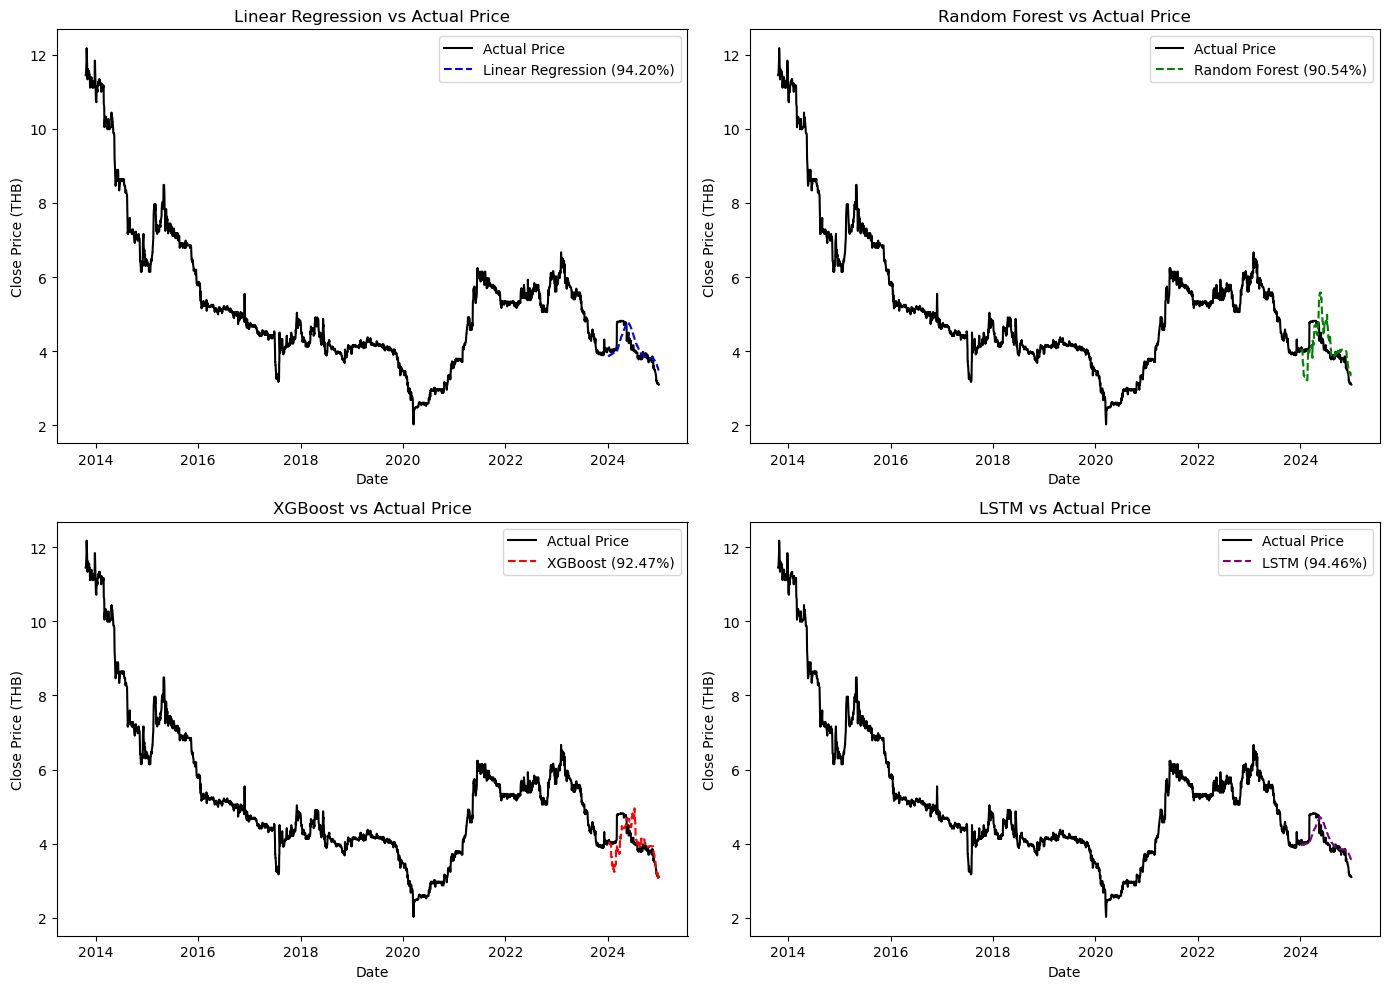

In [105]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# โหลดข้อมูลหุ้น (ถึงปี 2024)
ticker = "AMARIN.BK"
data = yf.download(ticker, start="2013-01-01", end="2024-12-31")
data = data[['Close']].dropna()

# สร้างฟีเจอร์ Moving Average
data['MA_50'] = data['Close'].rolling(window=50).mean()
data['MA_200'] = data['Close'].rolling(window=200).mean()
data.dropna(inplace=True)

# แบ่งข้อมูล Train/Test
train = data[:'2023']
test = data['2024':]  # ใช้ปี 2024 เป็น Test Data

X_train, y_train = train.drop(columns=['Close']), train['Close']
X_test, y_test = test.drop(columns=['Close']), test['Close']

# ---------- เทรนโมเดล ----------
lr = LinearRegression().fit(X_train, y_train)
rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
xgb = XGBRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)

# LSTM
X_train_lstm = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))

model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train_lstm, y_train, epochs=20, verbose=0)
y_pred_lstm = model.predict(X_test_lstm).flatten()

# ---------- คำนวณความแม่นยำ (MAPE) ----------
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr) * 100
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf) * 100
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb) * 100
mape_lstm = mean_absolute_percentage_error(y_test, y_pred_lstm) * 100

confidence_scores = {
    "Linear Regression": 100 - mape_lr,
    "Random Forest": 100 - mape_rf,
    "XGBoost": 100 - mape_xgb,
    "LSTM": 100 - mape_lstm
}

# ---------- พยากรณ์ 2025-2026 ----------
future_dates = pd.date_range(start="2025-01-01", periods=730, freq='D')
future_features = X_train.iloc[-730:].values  # ใช้ข้อมูลล่าสุด

future_pred_lr = lr.predict(future_features)
future_pred_rf = rf.predict(future_features)
future_pred_xgb = xgb.predict(future_features)

future_features_lstm = np.array(future_features).reshape((future_features.shape[0], future_features.shape[1], 1))
future_pred_lstm = model.predict(future_features_lstm).flatten()

# ---------- พล็อตกราฟแยกสำหรับแต่ละโมเดลเทียบกับข้อมูลจริง ----------
plt.figure(figsize=(14, 10))

# Linear Regression
plt.subplot(2, 2, 1)
plt.plot(data.index, data['Close'], label="Actual Price", color="black")
plt.plot(test.index, y_pred_lr, label=f"Linear Regression ({confidence_scores['Linear Regression']:.2f}%)", linestyle="dashed", color="blue")
plt.title("Linear Regression vs Actual Price")
plt.xlabel("Date")
plt.ylabel("Close Price (THB)")
plt.legend()

# Random Forest
plt.subplot(2, 2, 2)
plt.plot(data.index, data['Close'], label="Actual Price", color="black")
plt.plot(test.index, y_pred_rf, label=f"Random Forest ({confidence_scores['Random Forest']:.2f}%)", linestyle="dashed", color="green")
plt.title("Random Forest vs Actual Price")
plt.xlabel("Date")
plt.ylabel("Close Price (THB)")
plt.legend()

# XGBoost
plt.subplot(2, 2, 3)
plt.plot(data.index, data['Close'], label="Actual Price", color="black")
plt.plot(test.index, y_pred_xgb, label=f"XGBoost ({confidence_scores['XGBoost']:.2f}%)", linestyle="dashed", color="red")
plt.title("XGBoost vs Actual Price")
plt.xlabel("Date")
plt.ylabel("Close Price (THB)")
plt.legend()

# LSTM
plt.subplot(2, 2, 4)
plt.plot(data.index, data['Close'], label="Actual Price", color="black")
plt.plot(test.index, y_pred_lstm, label=f"LSTM ({confidence_scores['LSTM']:.2f}%)", linestyle="dashed", color="purple")
plt.title("LSTM vs Actual Price")
plt.xlabel("Date")
plt.ylabel("Close Price (THB)")
plt.legend()
plt.tight_layout()
plt.show()


In [106]:
print("\n📊 Confidence Score (% ความแม่นยำจากปี 2024):")
for model, acc in confidence_scores.items():
    print(f"{model}: {acc:.2f}%")


📊 Confidence Score (% ความแม่นยำจากปี 2024):
Linear Regression: 94.20%
Random Forest: 90.54%
XGBoost: 92.47%
LSTM: 94.46%


In [116]:
# แสดงผลลัพธ์
print("Predict stock price in next 3 year:")
for i, pred in enumerate(future_predictions[:10], 1):  # แสดงแค่ 10 วันแรก
    print(f"Day {i}: {pred[0]:.2f} THB")

Predict stock price in next 3 year:
Day 1: 3.43 THB
Day 2: 3.43 THB
Day 3: 3.38 THB
Day 4: 3.38 THB
Day 5: 3.36 THB
Day 6: 3.34 THB
Day 7: 3.34 THB
Day 8: 3.40 THB
Day 9: 3.44 THB
Day 10: 3.41 THB
